# Funzioni di variabili reali a valori reali
Vediamo in questo notebook come sia possibile riprodurre in Python i grafici di pagina 34 del libro Giaquinta-Modica, grafici che avete visto, o vedrete, nel corso di [Analisi 1](http://elearning1.unipv.it/matematica/course/view.php?id=10) (si veda su Kiro, per il corso di Analisi).

Per prima cosa dobbiamo importare nel workspace due librerie:

1. [Numpy](http://www.numpy.org/)
2. [Matplotlib](https://matplotlib.org/)

Come fatto nel primo laboratorio, per importare tutte le funzioni di una libreria esterna si usa il comando:

```
from <nome_libreria> import *
```

In questo modo, se al posto di `nome_libreria` mettiamo per esempio `numpy`, importeremo nel nostro workspace tutte le funzioni definite nella libreria `numpy`. Spesso, per tenere il workspace più pulito possibile (poche variabili, poche funzioni) si importano solo le funzioni della libreria che devono essere effettivamente usate.
Nel nostro caso, dalle due librerie ci bastano importare la funzione `linspace` e l'oggetto `plot`:

In [2]:
# Importo dalla libreria solo gli oggetti che mi servono veramente
from numpy import linspace
from matplotlib.pyplot import plot, xlabel, ylabel, show

Vediamo prima a cosa serve la funzione [linspace(a, b, n)](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html). Questa funzione serve per ottenere una sequenza di $n$ numeri equi distanziati nell'intervallo $[a,b]$. Per esempio:

In [3]:
linspace(0,10,21)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

In pratica, possiamo usare la funzione `linspace` per definire un dominio di una funzione come un insieme finito di punti in $\mathbb{R}$. Se facciamo riferimento alla Figura 3.8 del Giaquinta-Modica, potremmo definire il dominio:

In [ ]:
D = linspace(-2, 2, 1000)
print(D)

A partire da ogni punto del dominio possiamo calcolare ogni valore di $y=f(x)$ per ogni $x\in D$. Dobbiamo prima definire qual'è la funzione di cui vogliamo visualizzare il grafico. Consideriamo prima la funzione:

$$f(x) = x^2$$

Che può essere implementata in modo diretto con la procedura (usando l'operatore `**` SPIEGARE):

In [6]:
def Quadrato(x):
    return x**2

A questo punto ci serve un modo per applicare questa procedura (funzione matematica) ad ogni elemento del dominio di $f(x)$. Per far questo possiamo usare una sintassi particolare, chiamata **list comprehension**, definita come segue:

```
Y = [F(x) for x in D]
```

in cui `<for>` e `<in>` sono due parole chiave di Python, mentre `<F>`, `<D>`, e `<Y>` sono:

1. (input) `F()` è una procedura che implementa una funzione $f : \mathbb{R} \rightarrow \mathbb{R}$, come ad esempio la funzione `Quadrato` definita sopra.

2. (input) `D` è una sequenza di numeri a cui vogliamo applicare la funzione `F` data in input, ottenuta per esempio con la funzione `linspace`.

3. (output) `Y` è una sequenza di numeri, della stessa lunghezza di `D`, che contiene per ogni elemento `x` in `D`, il valore `F(x)`. 

Vediamo un semplice esempio concreto:

In [4]:
D = linspace(1,5,5)
print(D)

[ 1.  2.  3.  4.  5.]


In [7]:
Y = [Quadrato(x) for x in D]
print(Y)

[1.0, 4.0, 9.0, 16.0, 25.0]


Come si può vedere ad ogni elemento della sequenza `D` corrisponde un valore della sequenza `Y`, che contiene il suo quadrato. Potremmo usare questi punti per interpolare un grafico di questa funzione, ma per ottenere un'interpolazione accurata, dovremmo utilizzare un numero più elevato di elementi del dominio.

Se ritorniamo all'esempio di Figura 3.8 del Giaquinta-Modica, possiamo definire le coppie da rappresentare $(x, y=f(x))$ nel modo seguente:

In [8]:
D = linspace(-2,2,1000) # 1000 punti equi distanziati nell'intervallo [-2,2]

In [9]:
Y = [Quadrato(x) for x in D]

In [ ]:
print(D[0], Y[0])

Vediamo ora come utilizzare questi punti per creare un grafico di `Quadrato(x)`. 

Per poterlo fare dobbiamo utilizzare le funzione:

* `plot(x,y)`: prepara il grafico per ogni coppia di punti contenuti nelle due sequenza (della stessa lunghezza) x e y.
* `xlabel` e `ylabel`: servono per definire la descrizione dell'asse delle ascisse e delle ordinate
* `show`: serve per visualizzare effettivamente il grafico appena definito

Per maggiori dettagli, si veda la documentazione di [plot](http://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html), [xlabel](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xlabel.html), [ylabel](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.ylabel.html) e [show](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.show.html).

Utilizzando questi comandi, possiamo facilmente rappresentare graficamente la funzione $x^2$:

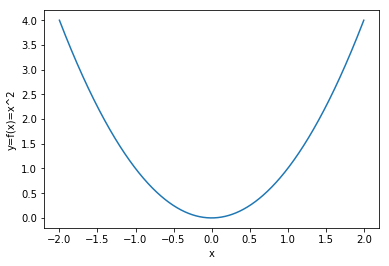

In [10]:
plot(D,Y)
xlabel("x")
ylabel("y=f(x)=x^2")
show()

Se invece di rappresentare la funzione $f(x)=x^2$ volessimo rappresentare la funzione $f(x)=x^3$, definita nello stesso dominio, ci basta calcolare la sequenza di numeri `Y`:

In [12]:
Y = [x*x*x for x in D]

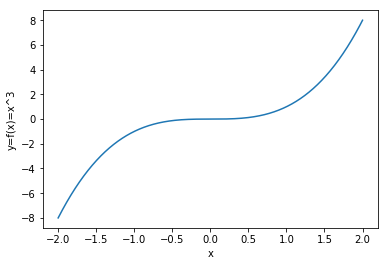

In [13]:
plot(D,Y)
xlabel("x")
ylabel("y=f(x)=x^3")
show()

Di solito quello che si vuole fare è di sovrapporre sullo stesso grafico funzioni tra di loro simili, ma che sono definite da parametri diversi. Se consideriamo la funzione potenza $f(x)=x^n$ per $x \in D$, potremmo voler dare una rappresentazione grafica delle quattro funzioni che si ottengono per $n \in \{1,2,3,4\}$. Questo può essere ottenuto in python richiamando più volte la funzione `plot(x,y)`, prima di chiamare la funzione `show()`.

**ESEMPIO:** (diverse funzioni sullo stesso plot)

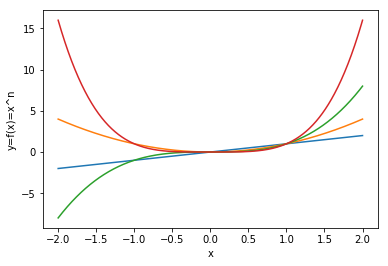

In [14]:
D = linspace(-2, 2, 1000)
plot(D, [x**1 for x in D])
plot(D, [x**2 for x in D])
plot(D, [x**3 for x in D])
plot(D, [x**4 for x in D])
xlabel("x")
ylabel("y=f(x)=x^n")
show()

Infine, può essere interessante a volte rappresentare una funzione in scala logaritmica su entrambi gli assi, oppure, può essere utile aggiungere una legenda al grafico, per poter distinguere facilmente le diverse funzioni rappresentate.

Per maggiori dettagli, si veda la documentazione di [legend](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.legend.html), [xscale](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.xscale.html) e[yscale](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.yscale.html).

**ESEMPIO:** (coordinate cartesiane e legenda)

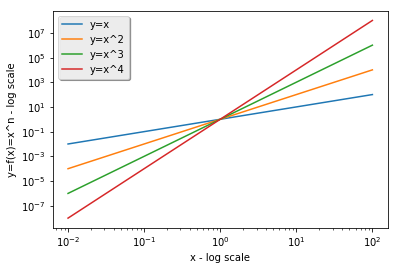

In [15]:
from matplotlib.pyplot import xscale, yscale, legend
D = linspace(0.01, 100, 1000)
plot(D, [x**1 for x in D], label="y=x")
plot(D, [x**2 for x in D], label="y=x^2")
plot(D, [x**3 for x in D], label="y=x^3")
plot(D, [x**4 for x in D], label="y=x^4")
xscale("log")
yscale("log")
xlabel("x - log scale")
ylabel("y=f(x)=x^n - log scale")
legend(loc="upper left", shadow=True)
show()

## Funzioni trigonometriche
Per poter rappresentare delle funzioni trigonometriche, è necessario utilizzare una terza libreria di Python (abbiamo già usato `numpy` e `matplotlib`), chiamata `math`, che definisce tutte le costanti (e.g. $\pi$ e $e$) e le funzioni matematiche (e.g. $\sin(x)$, $\log(x)$, $e^x$, sqrt$(x)=\sqrt(x)$, ...) di uso comune. Per la lista completa di funzioni implementate, consultare la [documentazione della libreria *math*](https://docs.python.org/3/library/math.html).

**ESEMPIO:** plot della funzione $f(x)=a\,sin(x)$, per $a=0.5,1,3$, nel dominio $[0,2 \pi]$.

In [16]:
# Per prima cosa importo la funzione sin(x) e la costante pi (pi-greco)
from math import sin, pi
print(pi)

3.141592653589793


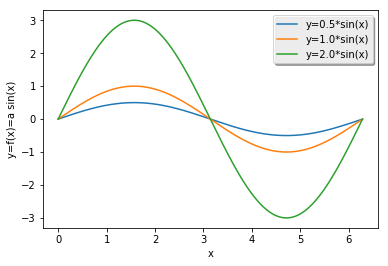

In [17]:
# Poi scrivo i comandi per ottenere i grafici voluti
D = linspace(0, 2*pi, 1000)
plot(D, [0.5*sin(x) for x in D], label="y=0.5*sin(x)")
plot(D, [1.0*sin(x) for x in D], label="y=1.0*sin(x)")
plot(D, [3.0*sin(x) for x in D], label="y=2.0*sin(x)")
xlabel("x")
ylabel("y=f(x)=a sin(x)")
legend(loc="upper right", shadow=True)
show()

**ESERCIZIO 5.1:** Rappresentare il grafico della funzione esponenziale $a^x$, nell'intervallo $[-4,4]$, utilizzando i seguenti valori di $a$: 1.2, 1.4 2 (sovrapporre i grafici nella stessa figura). (Nota: si dovrebbe ottenere un grafico simile a quello di Figura 3.19a in X).


**ESERCIZIO 5.2:** Rappresentare il grafico della funzione esponenziale $a^x$, nell'intervallo $[-4,4]$, utilizzando i seguenti valori di $a$: 0.8, 0.7, 0.5 (sovrapporre i grafici nella stessa figura). (Nota: si dovrebbe ottenere un grafico simile a quello di Figura 3.19b in X).

**ESERCIZIO 5.3:** Rappresentare il grafico della funzione tangente nell'intervallo $[-4 \pi, 4 \pi]$.